In [23]:
import pandas as pd 
import numpy as np
import warnings
from IPython.display import display
from ast import literal_eval
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [155]:
def read_file(path,limiter=','):
    df = pd.read_csv(path,delimiter=limiter)
    return df

def get_list(data):
    if isinstance(data, list):
        names = [col['name'] for col in data]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

def get_director(data):
    for d in data:
        if d['job']=='Director':
            return d['name']
    return np.nan

def clean_data(data):
    if isinstance(data,list):
        return data[:3]
    
def combination(x):
    return ' '.join(x['Cast']) + ' ' + x['Director'] + ' ' + ' '.join(x['Genres'])+' '+' '.join(x['overview']+' '.join(x['original_title']))


    

In [7]:
credits = read_file('/Users/saad/Desktop/Projects/Movie Recommendation System/Dataset/Hollywood Movies/tmdb_5000_credits.csv')
display(credits.head())
display(credits.describe())
display(credits.info())

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


None

The above analysis shows there are no missing values and the rows of the dataset are 4803

In [8]:
movies = read_file('/Users/saad/Desktop/Projects/Movie Recommendation System/Dataset/Hollywood Movies/tmdb_5000_movies.csv')
display(movies.head())
display(movies.describe())
display(movies.info())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

None

The above analysis shows that there are missing values in the id and the tagline. Since we have no information for those, only the one whihc have no missing values will be considered.

In [11]:
credits.rename(columns={"movie_id": "id"},inplace=True)
credits.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [47]:
meta = movies.merge(credits,on='id',how='left')
meta.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [48]:
meta.drop(columns=['id','tagline', 'status', 'homepage', 
                                        'keywords','vote_count', 'vote_average',
                                       'tagline', 'spoken_languages', 'runtime',
                                       'popularity', 'production_companies', 'budget',
                                       'production_countries', 'release_date', 'revenue',
                                        'title_x','title_y', 'original_language'],inplace=True)

In [49]:
meta.head()

,genres,original_title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [50]:
meta['Cast']=meta['cast'].apply(literal_eval)
meta['Genres']=meta['genres'].apply(literal_eval)
meta['Crew']=meta['crew'].apply(literal_eval)
meta.drop(columns=['genres','cast','crew'],inplace=True)
meta.head()

,original_title,overview,Cast,Genres,Crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [51]:
meta['Cast']=meta['Cast'].apply(get_list)
meta['Genres']=meta['Genres'].apply(get_list)
meta["Crew"]=meta['Crew'].apply(get_director)
meta.rename(columns={'Crew':'Director'},inplace=True)
meta.head()

,original_title,overview,Cast,Genres,Director
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]",James Cameron
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]",Gore Verbinski
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]",Sam Mendes
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]",Christopher Nolan
4,John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]",Andrew Stanton


In [146]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4803 non-null   object
 1   overview        4800 non-null   object
 2   Cast            4803 non-null   object
 3   Genres          4803 non-null   object
 4   Director        4773 non-null   object
dtypes: object(5)
memory usage: 225.1+ KB


In [150]:
meta['Director']=meta['Director'].fillna(' ')
meta['overview']=meta['overview'].fillna(' ')
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4803 non-null   object
 1   overview        4803 non-null   object
 2   Cast            4803 non-null   object
 3   Genres          4803 non-null   object
 4   Director        4803 non-null   object
dtypes: object(5)
memory usage: 225.1+ KB


## Hindi Movie Preprocessing 

In [74]:
h_movies = read_file('/Users/saad/Desktop/Projects/Movie Recommendation System/Dataset/Bollywood Movies/1950-2019/bollywood_full_1950-2019.csv')
h_movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112.0,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73.0,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549.0,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891.0,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280.0,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [75]:
h_movies.drop(columns=['title_x', 'poster_path', 'wiki_link', 'title_y','is_adult', 'year_of_release',
                       'runtime', 'imdb_rating', 'imdb_votes','story','tagline', 
                       'wins_nominations', 'release_date'],inplace=True)
h_movies.head()

,imdb_id,original_title,genres,summary,actors
0,tt8291224,Uri: The Surgical Strike,Action|Drama|War,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,tt9472208,Battalion 609,War,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,tt6986710,The Accidental Prime Minister,Biography|Drama,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,tt8108208,Why Cheat India,Crime|Drama,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,tt6028796,Evening Shadows,Drama,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...


In [76]:
h_movies.rename(columns={'genres':"Genres",'summary':'overview','actors':'Cast'},inplace=True)
h_movies.head()

,imdb_id,original_title,Genres,overview,Cast
0,tt8291224,Uri: The Surgical Strike,Action|Drama|War,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,tt9472208,Battalion 609,War,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,tt6986710,The Accidental Prime Minister,Biography|Drama,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,tt8108208,Why Cheat India,Crime|Drama,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,tt6028796,Evening Shadows,Drama,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...


### Need to find the director

In [97]:
h_crew1 = read_file('/Users/saad/Desktop/Projects/Movie Recommendation System/Dataset/Bollywood Movies/1950-2019/bollywood_crew_1950-2019.csv')
h_crew1.head()

,imdb_id,directors,writers
0,tt0042184,nm0025608,nm0025608|nm0324690
1,tt0042207,nm0490178,nm0161032|nm1879927
2,tt0042225,nm0707533,\N
3,tt0042233,nm0788880,nm0592578|nm0788880
4,tt0042380,nm0439074,nm1278450|nm0438022|nm1301772


In [98]:
h_crew2 = read_file('/Users/saad/Desktop/Projects/Movie Recommendation System/Dataset/Bollywood Movies/1950-2019/bollywood_crew_data_1950-2019.csv')
h_crew2.head()

,crew_id,name,born_year,death_year,profession,known_for
0,nm0001408,Shekhar Kapur,1945,\N,actor|director|producer,tt0240510|tt0414055|tt0109206|tt0127536
1,nm0002172,Mukul Anand,1951,1997,director|writer|producer,tt0104607|tt0102201|tt0098999|tt0092026
2,nm0002411,Mani Kaul,1944,2011,director|writer|actor,tt0207626|tt0066514|tt0070009|tt0102515
3,nm0003939,Vikramaditya Motwane,1976,\N,producer|writer|director,tt0238936|tt3322420|tt1639426|tt1327035
4,nm0004072,Kaizad Gustad,1968,\N,director|writer|miscellaneous,tt0330082|tt3309662|tt0168529|tt0819646


In [99]:
h_crew2.rename(columns={'crew_id':'directors','name':'Director'},inplace=True)
h_crew = h_crew1.merge(h_crew2,on='directors',how='left')
h_crew.head()

,imdb_id,directors,writers,Director,born_year,death_year,profession,known_for
0,tt0042184,nm0025608,nm0025608|nm0324690,Chetan Anand,1921,1997,director|writer|actor,tt0154942|tt0154749|tt0154565|tt0140784
1,tt0042207,nm0490178,nm0161032|nm1879927,Shaheed Latif,1913,1967,director|writer,tt0235094|tt0052220|tt0060145|tt0042207
2,tt0042225,nm0707533,\N,G. Rakesh,\N,\N,director,tt0404197|tt0042225
3,tt0042233,nm0788880,nm0592578|nm0788880,Kidar Nath Sharma,1910,1999,director|writer|actor,tt0039654|tt0042233|tt0141441|tt0374154
4,tt0042380,nm0439074,nm1278450|nm0438022|nm1301772,Abdul Rashid Kardar,1904,1989,director|producer|writer,tt0231218|tt0232253|tt0048816|tt0130643


In [100]:
h_crew.drop(['directors', 'writers','born_year', 'death_year',
       'profession', 'known_for'],axis=1,inplace=True)
h_crew.head()

,imdb_id,Director
0,tt0042184,Chetan Anand
1,tt0042207,Shaheed Latif
2,tt0042225,G. Rakesh
3,tt0042233,Kidar Nath Sharma
4,tt0042380,Abdul Rashid Kardar


In [101]:
h_meta = h_movies.merge(h_crew,on='imdb_id',how='left')
h_meta.head()

,imdb_id,original_title,Genres,overview,Cast,Director
0,tt8291224,Uri: The Surgical Strike,Action|Drama|War,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,Aditya Dhar
1,tt9472208,Battalion 609,War,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,Brijesh Batuknath Tripathi
2,tt6986710,The Accidental Prime Minister,Biography|Drama,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,Vijay Ratnakar Gutte
3,tt8108208,Why Cheat India,Crime|Drama,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,Soumik Sen
4,tt6028796,Evening Shadows,Drama,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,Sridhar Rangayan


In [102]:
h_meta.drop(['imdb_id'],axis=1,inplace=True)
h_meta.head()

,original_title,Genres,overview,Cast,Director
0,Uri: The Surgical Strike,Action|Drama|War,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,Aditya Dhar
1,Battalion 609,War,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,Brijesh Batuknath Tripathi
2,The Accidental Prime Minister,Biography|Drama,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,Vijay Ratnakar Gutte
3,Why Cheat India,Crime|Drama,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,Soumik Sen
4,Evening Shadows,Drama,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,Sridhar Rangayan


In [103]:
h_meta['Cast']=h_meta['Cast'].str.split('|')
h_meta['Genres']=h_meta['Genres'].str.split('|')
h_meta.head()

,original_title,Genres,overview,Cast,Director
0,Uri: The Surgical Strike,"[Action, Drama, War]",Indian army special forces execute a covert op...,"[Vicky Kaushal, Paresh Rawal, Mohit Raina, Yam...",Aditya Dhar
1,Battalion 609,[War],The story of Battalion 609 revolves around a c...,"[Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat, ...",Brijesh Batuknath Tripathi
2,The Accidental Prime Minister,"[Biography, Drama]",Explores Manmohan Singh's tenure as the Prime ...,"[Anupam Kher, Akshaye Khanna, Aahana Kumra, At...",Vijay Ratnakar Gutte
3,Why Cheat India,"[Crime, Drama]",The movie focuses on existing malpractices in ...,"[Emraan Hashmi, Shreya Dhanwanthary, Snighdade...",Soumik Sen
4,Evening Shadows,[Drama],Under the 'Evening Shadows' truth often plays...,"[Mona Ambegaonkar, Ananth Narayan Mahadevan, D...",Sridhar Rangayan


In [104]:
h_meta['Cast']=h_meta['Cast'].apply(clean_data)
h_meta.head()

,original_title,Genres,overview,Cast,Director
0,Uri: The Surgical Strike,"[Action, Drama, War]",Indian army special forces execute a covert op...,"[Vicky Kaushal, Paresh Rawal, Mohit Raina]",Aditya Dhar
1,Battalion 609,[War],The story of Battalion 609 revolves around a c...,"[Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat]",Brijesh Batuknath Tripathi
2,The Accidental Prime Minister,"[Biography, Drama]",Explores Manmohan Singh's tenure as the Prime ...,"[Anupam Kher, Akshaye Khanna, Aahana Kumra]",Vijay Ratnakar Gutte
3,Why Cheat India,"[Crime, Drama]",The movie focuses on existing malpractices in ...,"[Emraan Hashmi, Shreya Dhanwanthary, Snighdade...",Soumik Sen
4,Evening Shadows,[Drama],Under the 'Evening Shadows' truth often plays...,"[Mona Ambegaonkar, Ananth Narayan Mahadevan, D...",Sridhar Rangayan


In [105]:
h_meta = h_meta[meta.columns]
h_meta.head()

,original_title,overview,Cast,Genres,Director
0,Uri: The Surgical Strike,Indian army special forces execute a covert op...,"[Vicky Kaushal, Paresh Rawal, Mohit Raina]","[Action, Drama, War]",Aditya Dhar
1,Battalion 609,The story of Battalion 609 revolves around a c...,"[Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat]",[War],Brijesh Batuknath Tripathi
2,The Accidental Prime Minister,Explores Manmohan Singh's tenure as the Prime ...,"[Anupam Kher, Akshaye Khanna, Aahana Kumra]","[Biography, Drama]",Vijay Ratnakar Gutte
3,Why Cheat India,The movie focuses on existing malpractices in ...,"[Emraan Hashmi, Shreya Dhanwanthary, Snighdade...","[Crime, Drama]",Soumik Sen
4,Evening Shadows,Under the 'Evening Shadows' truth often plays...,"[Mona Ambegaonkar, Ananth Narayan Mahadevan, D...",[Drama],Sridhar Rangayan


In [108]:
h_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4425 entries, 0 to 4424
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4425 non-null   object
 1   overview        4424 non-null   object
 2   Cast            4415 non-null   object
 3   Genres          4425 non-null   object
 4   Director        4251 non-null   object
dtypes: object(5)
memory usage: 207.4+ KB


In [119]:
h_meta['Director'].fillna(' ',inplace=True)
h_meta['overview'].fillna(' ',inplace=True)

In [143]:
h_meta[h_meta.isnull().any(axis=1)]

,original_title,overview,Cast,Genres,Director
677,Will You Marry Me,,None,[Drama],
975,Bal Ganesh 2,Lord Ganesha evolves from a mischievous boy w...,None,[Animation],Pankaj Sharma
1457,Final Solution,The Final Solution is a 2003 documentary direc...,None,[Documentary],Rakesh Sharma
2456,Bahurani,Amit (Rakesh Roshan) is a big city boy but hi...,None,"[Comedy, Drama, Family]",Manik Chatterjee
3475,Ek Anek Aur Ekta,A young girl teaches her younger sibling about...,None,"[Animation, Short]",Bhimsain


In [139]:
h_meta=h_meta[h_meta['overview']!='Add a Plot\xa0»']

In [140]:
h_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4158 non-null   object
 1   overview        4158 non-null   object
 2   Cast            4153 non-null   object
 3   Genres          4158 non-null   object
 4   Director        4158 non-null   object
dtypes: object(5)
memory usage: 194.9+ KB


In [144]:
h_meta=h_meta[~h_meta.isnull().any(axis=1)]
h_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4153 entries, 0 to 4423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  4153 non-null   object
 1   overview        4153 non-null   object
 2   Cast            4153 non-null   object
 3   Genres          4153 non-null   object
 4   Director        4153 non-null   object
dtypes: object(5)
memory usage: 194.7+ KB


## Combining the two

In [152]:
combined = pd.concat([meta,h_meta],axis=0)
display(combined.head())
display(combined.info())

,original_title,overview,Cast,Genres,Director
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]",James Cameron
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]",Gore Verbinski
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]",Sam Mendes
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]",Christopher Nolan
4,John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]",Andrew Stanton


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8956 entries, 0 to 4423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  8956 non-null   object
 1   overview        8956 non-null   object
 2   Cast            8956 non-null   object
 3   Genres          8956 non-null   object
 4   Director        8956 non-null   object
dtypes: object(5)
memory usage: 419.8+ KB


None

In [156]:
combined['Combined']= combined.apply(combination,axis=1)
combined.head()

,original_title,overview,Cast,Genres,Director,Combined
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]",James Cameron,Sam Worthington Zoe Saldana Sigourney Weaver J...
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]",Gore Verbinski,Johnny Depp Orlando Bloom Keira Knightley Gore...
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]",Sam Mendes,Daniel Craig Christoph Waltz Léa Seydoux Sam M...
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]",Christopher Nolan,Christian Bale Michael Caine Gary Oldman Chris...
4,John Carter,"John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]",Andrew Stanton,Taylor Kitsch Lynn Collins Samantha Morton And...


In [157]:
combined.to_excel('Preprocessed File.xls')

# Demographic Filtering

we will use the IMDB' rating methodolgy to calculate the scoring of each movie. The formula is as follows:

weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
 
  R = average for the movie (mean) = (Rating)

  v = number of votes for the movie = (votes)

  m = minimum votes required to be listed

  C = the mean vote across the whole report


In [0]:
C= movies['vote_average'].mean()
print(C)

6.092171559442011


In [0]:
# calculating m

m= movies['vote_count'].quantile(0.90)
print(m)

1838.4000000000015


In [0]:
rated_movie = movies.copy(deep=True).loc[movies['vote_count']>=m]
rated_movie.shape

(481, 23)

In [0]:
rated_movie.head()

In [0]:
rated_movie['score']=((rated_movie['vote_count']/(rated_movie['vote_count']+m))*rated_movie['vote_average']) + ((m/(rated_movie['vote_count']+m))*C)
                     

In [0]:
rated_movie = rated_movie.sort_values('score', ascending=False)

In [0]:
rated_movie.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,

Text(0.5, 1.0, "People's Choice")

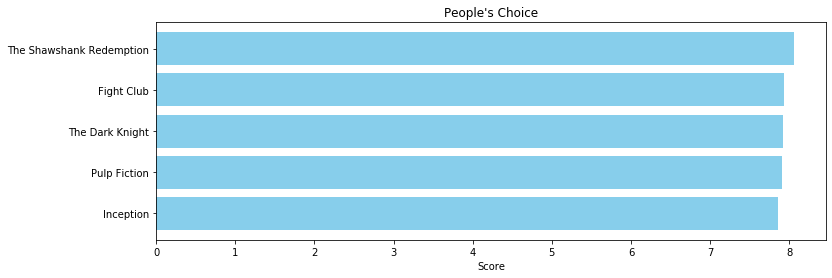

In [0]:
plt.figure(figsize=(12,4))

plt.barh(rated_movie['title_y'].head(5),rated_movie['score'].head(5), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Score")
plt.title("People's Choice")

# Content Based Filtering

The next type of filtering that we can utilize is content based filtering. 

In [0]:
movies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [0]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [0]:
movies['overview'].fillna('',inplace=True)

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
vec_matrix = vectorizer.fit_transform(movies['overview'])
print(vec_matrix.shape)

(4803, 20978)


In [0]:
cos_similar = linear_kernel(vec_matrix,vec_matrix)

In [0]:
indices = pd.Series(movies.index, index=movies['title_x']).drop_duplicates()

In [0]:
def recommendations(title,similarity=cos_similar):
    idx = indices[title]
    sim = list(enumerate(similarity[idx]))
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    sim = sim[1:11]
    movie_indices = [i[0] for i in sim]
    return movies['title_x'].iloc[movie_indices]


In [0]:
recommendations('Iron Man')

79                     Iron Man 2
31                     Iron Man 3
1868           Cradle 2 the Grave
7         Avengers: Age of Ultron
538                       Hostage
119                 Batman Begins
1290     Baahubali: The Beginning
4574                     Roadside
2044           The Little Vampire
2633    The Clan of the Cave Bear
Name: title_x, dtype: object

In order to make the content based recommender more robust we will add more parameters into it.

In [0]:
movies['cast'][0]

In [0]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

In [0]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [0]:
def director(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
    return np.nan

In [0]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [0]:
# Define new director, cast, genres and keywords features that are in a suitable form.
movies['director'] = movies['crew'].apply(director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [0]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [0]:
movies['production_companies']=movies['production_companies'].apply(literal_eval).apply(get_list)

In [0]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [0]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [0]:
features = ['cast', 'keywords', 'director', 'genres','overview','production_companies']

for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [0]:
def combination(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])+' '+' '.join(x['production_companies'])
movies['combined'] = movies.apply(combination, axis=1)

In [0]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director,combined
0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"inthe22ndcentury,aparaplegicmarineisdispatched...",150.437577,"[ingeniousfilmpartners, twentiethcenturyfoxfil...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"captainbarbossa,longbelievedtobedead,hascomeba...",139.082615,"[waltdisneypictures, jerrybruckheimerfilms, se...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,acrypticmessagefrombond’spastsendshimonatrailt...,107.376788,"[columbiapictures, danjaq, b24]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,"followingthedeathofdistrictattorneyharveydent,...",112.312950,"[legendarypictures, warnerbros., dcentertainment]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"johncarterisawar-weary,formermilitarycaptainwh...",43.926995,[waltdisneypictures],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words='english')
count_vec_matrix = count_vec.fit_transform(movies['combined'])

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

cos_similar2 = cosine_similarity(count_vec_matrix, count_vec_matrix)

In [0]:
movies = movies.reset_index()
indices = pd.Series(movies.index, index=movies['title_x'])

In [0]:
recommendations('The Dark Knight Rises',cos_similar2)

65               The Dark Knight
119                Batman Begins
14                  Man of Steel
1196                The Prestige
4638    Amidst the Devil's Wings
10              Superman Returns
1035                   Jonah Hex
299               Batman Forever
303                     Catwoman
747               Gangster Squad
Name: title_x, dtype: object

# Colaborative Filtering

Since the initial dataset didnt had any userID information, so we will use a different dataset to build the recommender system on colaborative filter

In [0]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
r=Reader()

In [0]:
ratings = pd.read_csv('/content/ratings_small.csv')

In [0]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [0]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],r)

In [0]:
algo=SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9106  0.8864  0.8951  0.8988  0.8946  0.8971  0.0079  
MAE (testset)     0.6985  0.6830  0.6881  0.6903  0.6914  0.6903  0.0050  
Fit time          4.49    4.51    4.60    4.47    4.45    4.50    0.05    
Test time         0.13    0.25    0.14    0.13    0.23    0.18    0.05    


{'fit_time': (4.486847877502441,
  4.511595726013184,
  4.603022336959839,
  4.46574592590332,
  4.451321125030518),
 'test_mae': array([0.69846322, 0.6829812 , 0.68809451, 0.69034755, 0.69140326]),
 'test_rmse': array([0.91057422, 0.88642714, 0.89508384, 0.89881724, 0.89456965]),
 'test_time': (0.1315441131591797,
  0.2519216537475586,
  0.13776731491088867,
  0.12950825691223145,
  0.22987771034240723)}

In [0]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [0]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [0]:
algo.predict(1, 302,3,True)

Prediction(uid=1, iid=302, r_ui=3, est=2.7744162532359495, details={'was_impossible': False})

# Deep Neural Network

In [0]:
df = pd.read_csv('/content/u.data',sep='\t',names="user_id,item_id,rating,timestamp".split(","))


In [0]:
df.head()
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['item_id'] = df['item_id'].astype('category').cat.codes.values

In [0]:
df.head()

,user_id,item_id,rating,timestamp
0,195,241,3,881250949
1,185,301,3,891717742
2,21,376,1,878887116
3,243,50,2,880606923
4,165,345,1,886397596


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [0]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies = len(df.user_id.unique()), len(df.item_id.unique())
n_latent_factors = 3

In [0]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

# prod = keras.layers.merge([movie_vec, user_vec], mode='dot',name='DotProduct')
prod = keras.layers.dot([movie_vec, user_vec], axes=1, normalize=False)
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         5049        Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         2832        User[0][0]                       
____________________________________________________________________________________________

In [0]:
test.head()

,user_id,item_id,rating,timestamp
82076,850,265,3,886534672
30616,404,555,1,885546636
45838,544,742,3,879901322
58232,302,229,3,879483511
42565,17,22,4,880130065


In [0]:
test.shape,train.shape

((20000, 4), (80000, 4))

In [0]:
dev,test1=train_test_split(test,test_size=0.5)

In [0]:
dev.shape,test1.shape

((10000, 4), (10000, 4))

In [0]:
history = model.fit([train.user_id, train.item_id], train.rating, batch_size=1024,
                    validation_data=([dev.user_id,dev.item_id],dev.rating),
                    epochs=100, verbose=1)

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8127 - val_loss: 0.8967
Epoch 2/100
80000/80000 [==============================] - 0s 3us/step - loss: 0.8119 - val_loss: 0.8958
Epoch 3/100
80000/80000 [==============================] - 0s 3us/step - loss: 0.8112 - val_loss: 0.8951
Epoch 4/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8105 - val_loss: 0.8946
Epoch 5/100
80000/80000 [==============================] - 0s 3us/step - loss: 0.8099 - val_loss: 0.8940
Epoch 6/100
80000/80000 [==============================] - 0s 3us/step - loss: 0.8094 - val_loss: 0.8936
Epoch 7/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8089 - val_loss: 0.8932
Epoch 8/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8084 - val_loss: 0.8930
Epoch 9/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8080 - val_loss: 0.8928
Epoch

In [0]:
from sklearn.metrics import mean_absolute_error as mae
ans = mae(test1.rating,model.predict([test1.user_id,test1.item_id]))

In [0]:
print(ans)

0.731275659687724


In [0]:
from keras.constraints import non_neg
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='NonNegMovie-Embedding', embeddings_constraint=non_neg())(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='NonNegUser-Embedding',embeddings_constraint=non_neg())(user_input))

#prod = keras.layers.merge([movie_vec, user_vec], mode='dot',name='DotProduct')
prod = keras.layers.dot([movie_vec, user_vec], axes=1, normalize=False)
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

In [0]:
history = model.fit([train.user_id, train.item_id], train.rating, batch_size=1024,
                    validation_data=([dev.user_id,dev.item_id],dev.rating),
                    epochs=100, verbose=1)

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 0s 6us/step - loss: 13.7095 - val_loss: 13.4539
Epoch 2/100
80000/80000 [==============================] - 0s 4us/step - loss: 13.4334 - val_loss: 13.0065
Epoch 3/100
80000/80000 [==============================] - 0s 4us/step - loss: 12.8053 - val_loss: 12.2169
Epoch 4/100
80000/80000 [==============================] - 0s 4us/step - loss: 11.8577 - val_loss: 11.1515
Epoch 5/100
80000/80000 [==============================] - 0s 4us/step - loss: 10.6718 - val_loss: 9.8989
Epoch 6/100
80000/80000 [==============================] - 0s 3us/step - loss: 9.3401 - val_loss: 8.5521
Epoch 7/100
80000/80000 [==============================] - 0s 4us/step - loss: 7.9596 - val_loss: 7.2054
Epoch 8/100
80000/80000 [==============================] - 0s 4us/step - loss: 6.6193 - val_loss: 5.9363
Epoch 9/100
80000/80000 [==============================] - 0s 3us/step - loss: 5.3917 - val_loss: 4.8

In [0]:
from sklearn.metrics import mean_absolute_error as mae
ans1 = mae(test1.rating,model.predict([test1.user_id,test1.item_id]))
print(ans1)

0.7509986679261085


In [0]:
n_latent_factors_user = 5
n_latent_factors_movie = 8

movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)


# concat = keras.layers.merge([movie_vec, user_vec], mode='concat',name='Concat')
concat = keras.layers.concatenate([movie_vec, user_vec],axis=1)
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
# adam = Adam(lr=0.005)
model = keras.Model([user_input, movie_input], result)
model.compile(optimizer='adam',loss= 'mean_squared_error')

In [0]:
history = model.fit([train.user_id, train.item_id], train.rating, batch_size=1024,
                    validation_data=([dev.user_id,dev.item_id],dev.rating),
                    epochs=100, verbose=1)

Train on 80000 samples, validate on 10000 samples
Epoch 1/100
80000/80000 [==============================] - 1s 12us/step - loss: 3.9620 - val_loss: 1.0215
Epoch 2/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.9647 - val_loss: 0.9013
Epoch 3/100
80000/80000 [==============================] - 0s 6us/step - loss: 0.9086 - val_loss: 0.8901
Epoch 4/100
80000/80000 [==============================] - 0s 4us/step - loss: 0.8924 - val_loss: 0.8868
Epoch 5/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.8844 - val_loss: 0.8853
Epoch 6/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.8805 - val_loss: 0.8828
Epoch 7/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.8750 - val_loss: 0.8840
Epoch 8/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.8739 - val_loss: 0.8835
Epoch 9/100
80000/80000 [==============================] - 0s 5us/step - loss: 0.8707 - val_loss: 0.8839
Epoc

In [0]:
from sklearn.metrics import mean_absolute_error as mae
ans2 = mae(test1.rating,model.predict([test1.user_id,test1.item_id]))
print(ans2)

0.7306314009994268
